------
## Hypothesis 1: Style Drives Value
-- -------------------------------------
### Do artworks from certain styles consistently fetch higher average sale prices than works from other movements?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df_top_styles_avg = pd.read_csv('avg_sale_price_per_style.csv')

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_35795/1471234860.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_styles_avg, y='style', x='avg_sale_price', palette='viridis', orient='h')


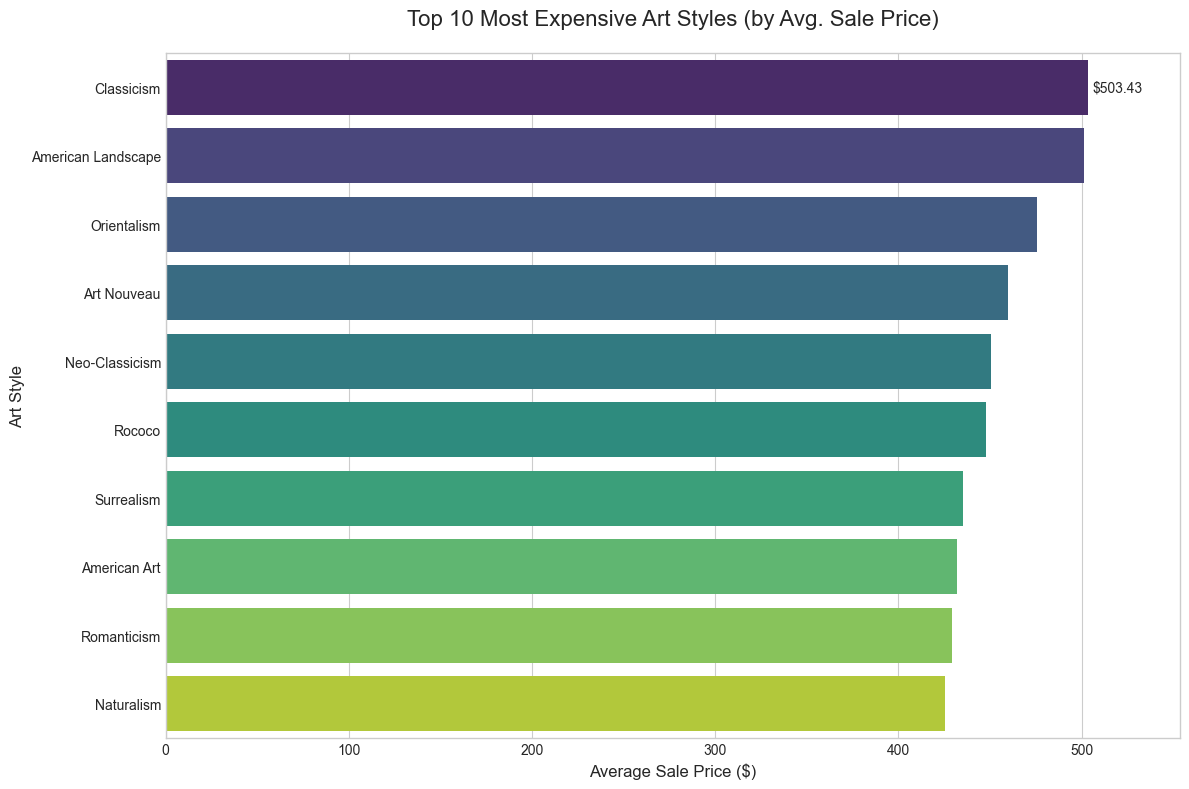

In [3]:
# --- Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar plot
sns.barplot(data=df_top_styles_avg, y='style', x='avg_sale_price', palette='viridis', orient='h')

# Add titles and labels
ax.set_title('Top 10 Most Expensive Art Styles (by Avg. Sale Price)', fontsize=16, pad=20)
ax.set_xlabel('Average Sale Price ($)', fontsize=12)
ax.set_ylabel('Art Style', fontsize=12)

# Add data labels to the bars
ax.bar_label(ax.containers[0], fmt='$%.2f', padding=3)

# Adjust plot limits to give space for labels
ax.set_xlim(0, df_top_styles_avg['avg_sale_price'].max() * 1.1)

plt.tight_layout()
plt.show()


## Outcome: 

### There is a clear relationship between style and average sale price.

------
## Hypothesis 1a: Average vs Median
------

### Hypothesis: The average sale price per style might be skewed by a few high-priced outliers.

In [4]:
df_top_styles_median = pd.read_csv('median_sale_price_per_style.csv')

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_35795/1178339262.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_styles_median, y='style', x='median_sale_price', palette='viridis', orient='h')


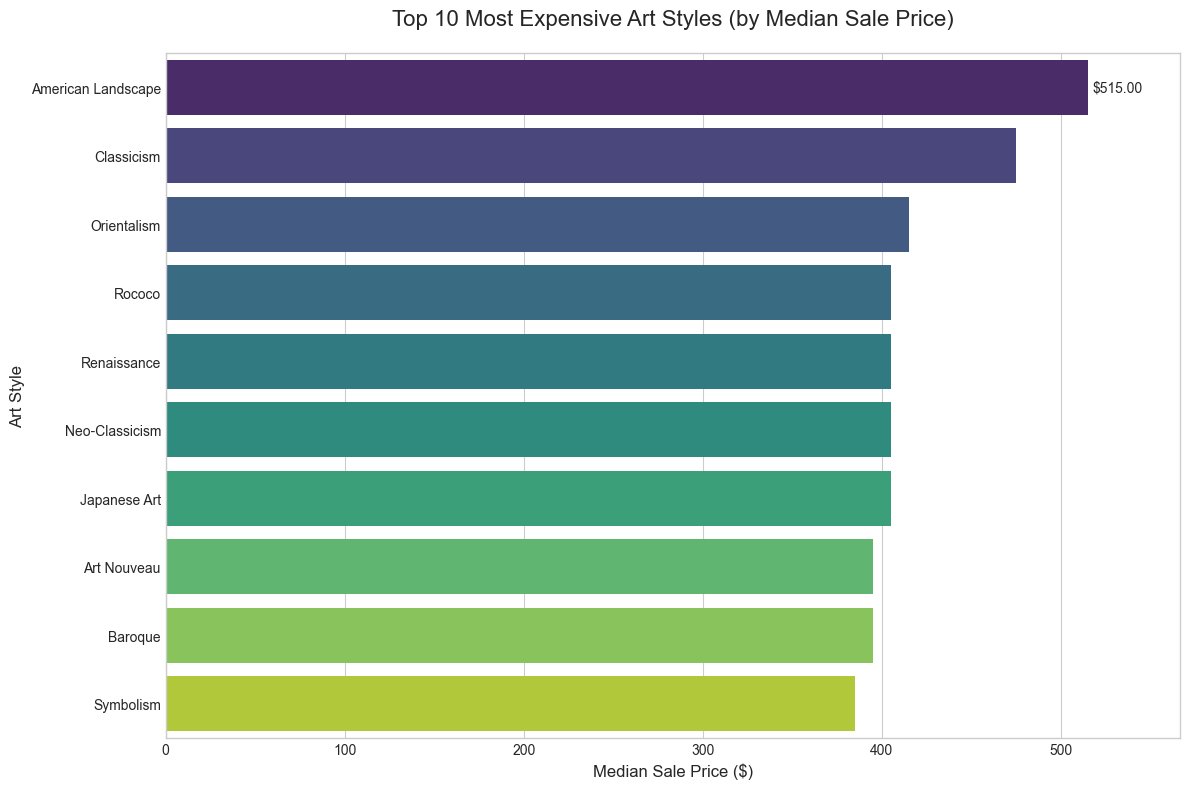

In [5]:
# --- Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Create the horizontal bar plot
sns.barplot(data=df_top_styles_median, y='style', x='median_sale_price', palette='viridis', orient='h')

# Add titles and labels
ax.set_title('Top 10 Most Expensive Art Styles (by Median Sale Price)', fontsize=16, pad=20)
ax.set_xlabel('Median Sale Price ($)', fontsize=12)
ax.set_ylabel('Art Style', fontsize=12)

# Add data labels to the bars
ax.bar_label(ax.containers[0], fmt='$%.2f', padding=3)

# Adjust plot limits to give space for labels
ax.set_xlim(0, df_top_styles_median['median_sale_price'].max() * 1.1)

plt.tight_layout()
plt.show()


## Outcome:

### Art Nouveau, Surrealism, American Art, Naturalism don't appear, suggesting high-priced outliers. Renaissance, Baroque, Japanese Art, Symbolism are now included. Some of these genres are more niche than the main median & average styles, prompting the question, does rarity ensure a consistently higher price?

-- ---------------------------------
## Hypothesis 2: The Value of Rarity
-- ---------------------------------

### Does the rarity of the art impact its sale price?

In [6]:
df_value_of_rarity = pd.read_csv("value_of_rarity.csv")

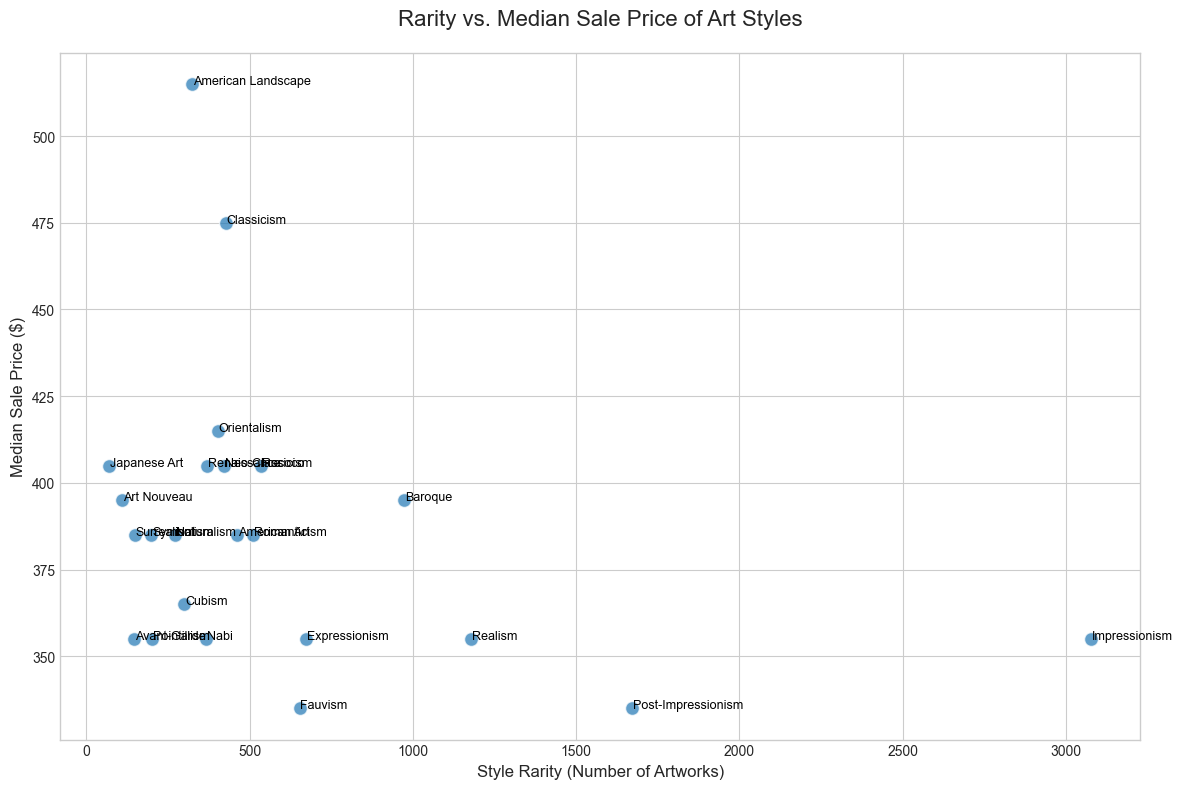

In [7]:

# --- Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

# Create the scatter plot
# x-axis is rarity (style_count), y-axis is price (median_sale_price)
ax.scatter(data=df_value_of_rarity, x='style_count', y='median_sale_price', alpha=0.7, edgecolors='w', s=100)

# This loops through each row in the DataFrame
for index, row in df_value_of_rarity.iterrows():
    # This draws the 'style' name at the x and y coordinates of the data point
    ax.text(
        x=row['style_count'] + 3,  # Add a small offset to not overlap the dot
        y=row['median_sale_price'],
        s=row['style'],          # The text string to draw
        fontdict=dict(color='black', size=9) # Optional: style the text
    )

# Add titles and labels
ax.set_title('Rarity vs. Median Sale Price of Art Styles', fontsize=16, pad=20)
ax.set_xlabel('Style Rarity (Number of Artworks)', fontsize=12)
ax.set_ylabel('Median Sale Price ($)', fontsize=12)

plt.tight_layout()
plt.show()


## Outcome: 

### There is a clear trend between an artwork style's rarity (number of available paintings) and its median sale price. Post-Impressionism has 1672 available works, and its median price is $335. American Landscape has only 323 available works, 5 times fewer, while fetching $515 per painting, 54% more.

-- -------------------------------------
## Hypothesis 3: The Nationality Premium
-- -------------------------------------

### Is there a "premium" for artists of a certain nationality? 

In [8]:
df_nationality_premium_top_5 = pd.read_csv("top 5 styles by median price.csv")

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_35795/3199355308.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


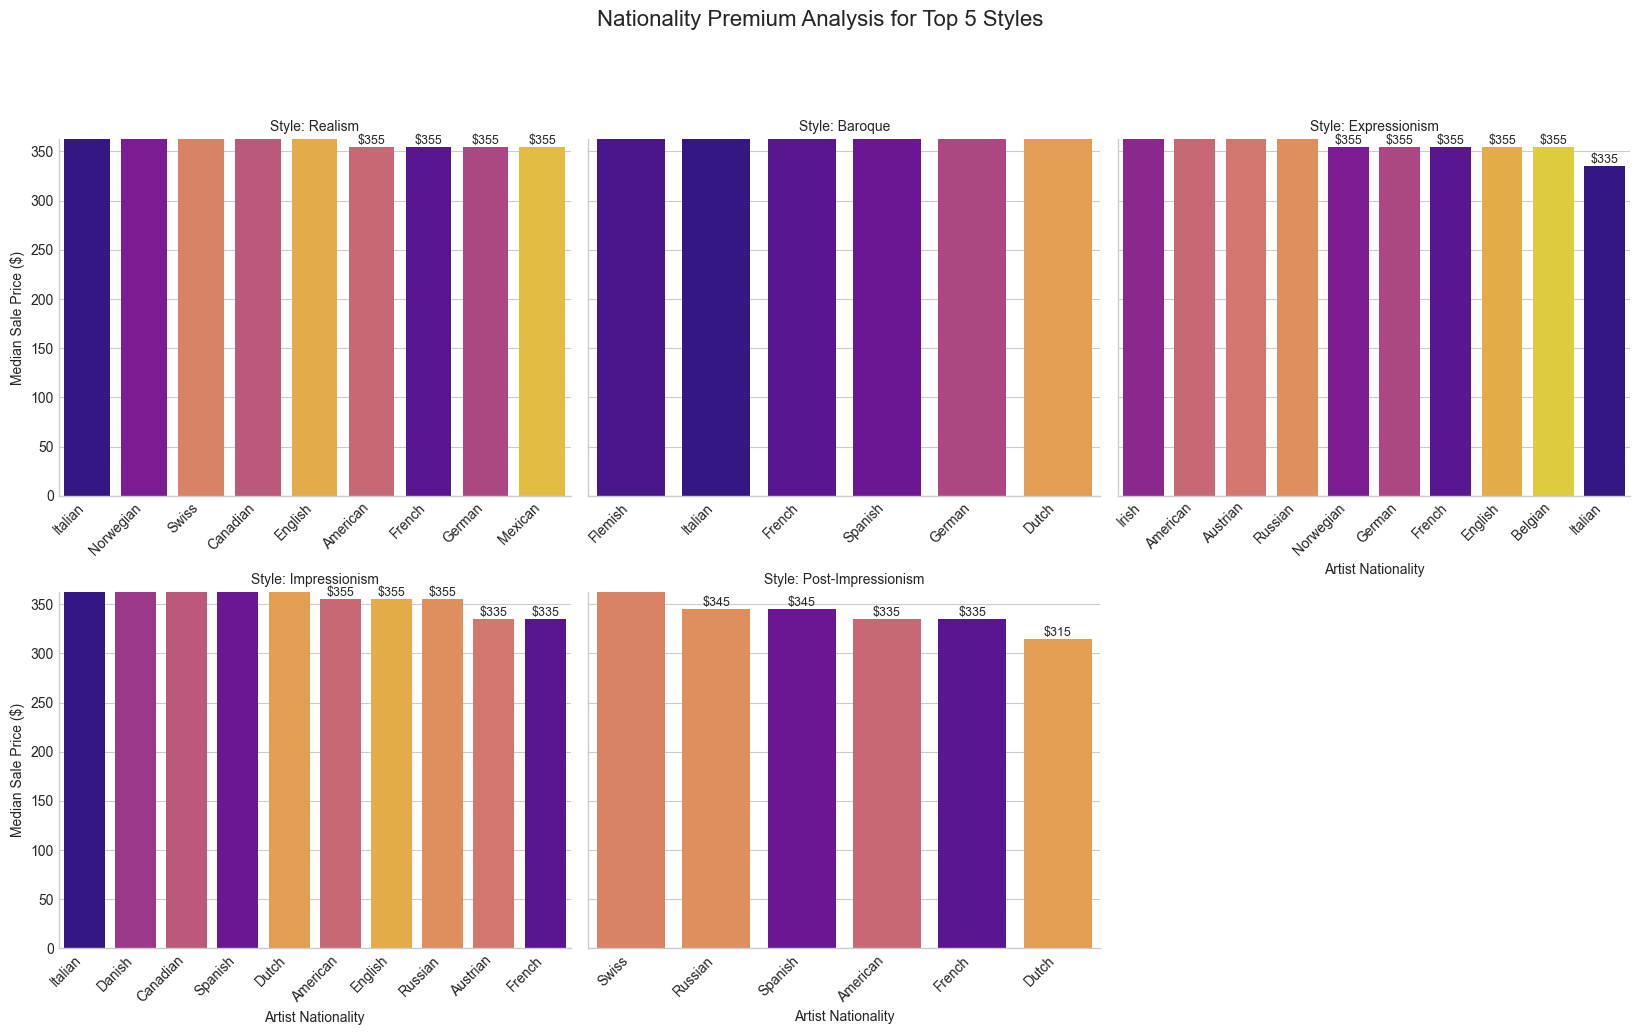

In [9]:
# --- Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')

# Create the Faceted Plot using catplot
g = sns.catplot(
    data=df_nationality_premium_top_5,
    x='nationality',
    y='median_sale_price',
    col='style',
    kind='bar',
    col_wrap=3,      # Wrap to the next row after 3 plots
    height=5,
    aspect=1.1,
    palette='plasma',
    sharex=False     # Allow each subplot to have its own x-axis labels
)

# --- Polish the Plot ---
# Add a clear overall title
g.fig.suptitle('Nationality Premium Analysis for Top 5 Styles', y=1.03, fontsize=16)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45, ha='right')

# Set clearer labels for axes
g.set_axis_labels("Artist Nationality", "Median Sale Price ($)")

# Set individual subplot titles
g.set_titles("Style: {col_name}")

# Add data labels to the bars
for ax in g.axes.flatten():
    # Check if the subplot has any bars before trying to add labels
    if ax.containers:
        for container in ax.containers:
            # Check if there's data in the container
            if container.datavalues.size > 0:
                ax.bar_label(container, fmt='$%.0f', fontsize=9)
                # Adjust y-axis to give space for labels
                ax.set_ylim(0, max(container.datavalues) * 1.15)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()



In [10]:
df_nationality_premium_bottom_10 = pd.read_csv("bottom 10 styles by median price.csv")

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_35795/2776081380.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


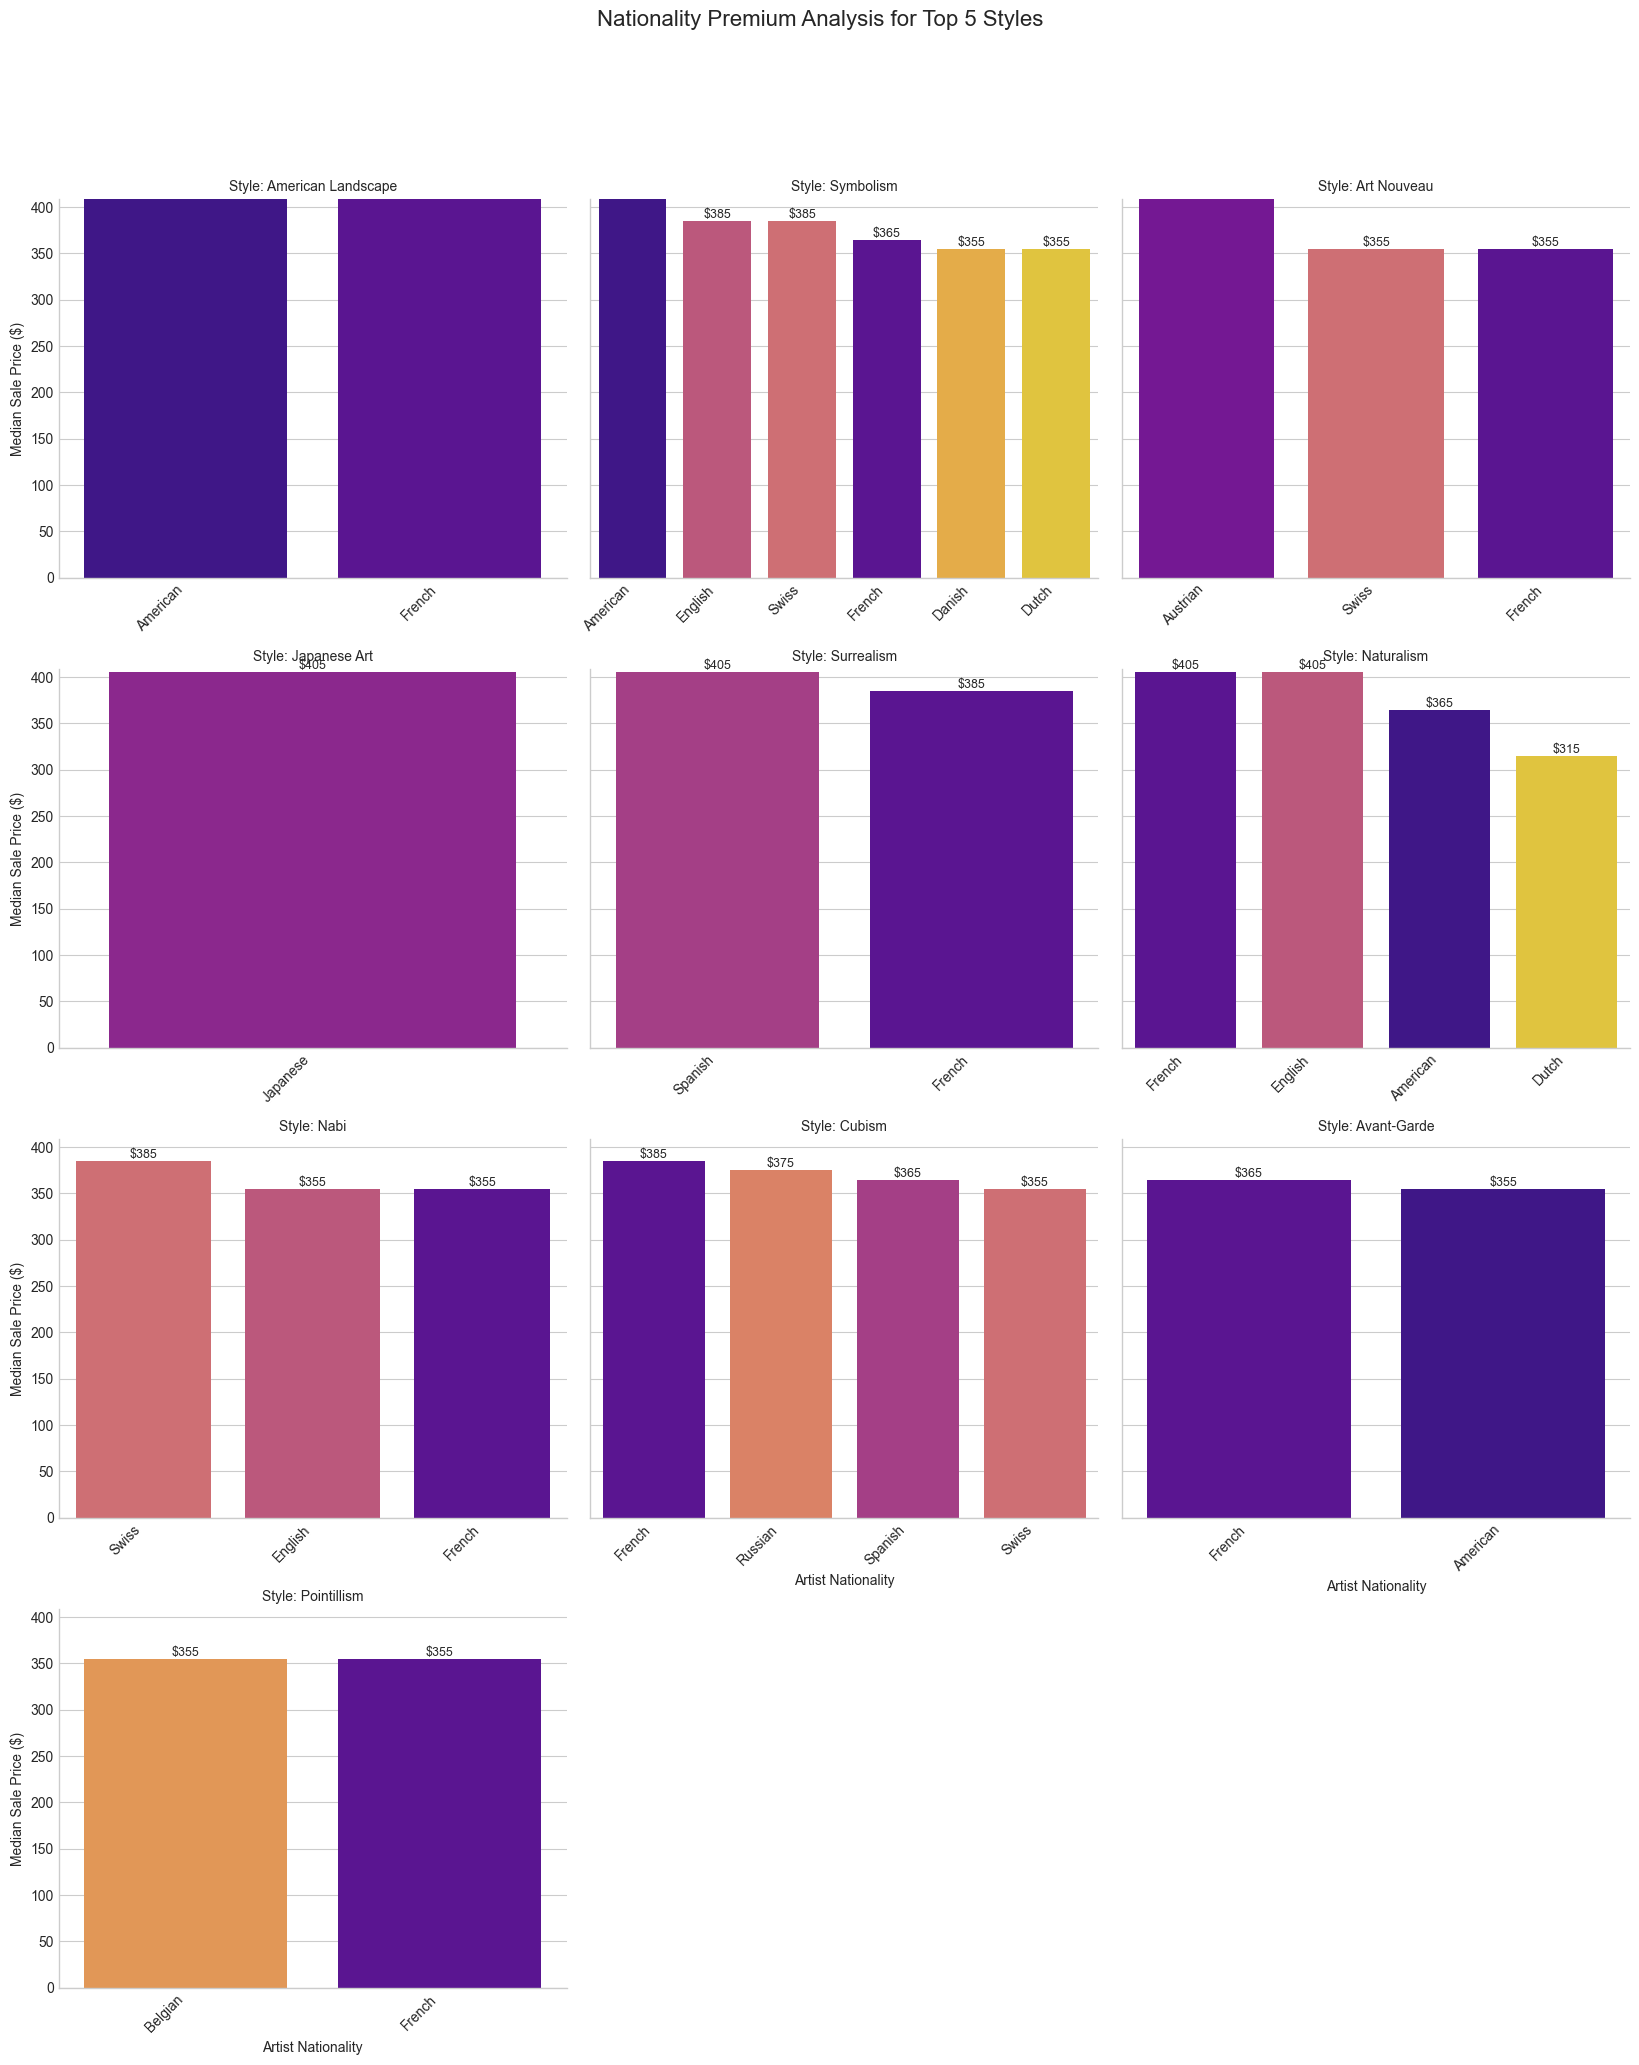

In [11]:
# --- Visualization ---
plt.style.use('seaborn-v0_8-whitegrid')

# Create the Faceted Plot using catplot
g = sns.catplot(
    data=df_nationality_premium_bottom_10,
    x='nationality',
    y='median_sale_price',
    col='style',
    kind='bar',
    col_wrap=3,      # Wrap to the next row after 3 plots
    height=5,
    aspect=1.1,
    palette='plasma',
    sharex=False     # Allow each subplot to have its own x-axis labels
)

# --- Polish the Plot ---
# Add a clear overall title
g.fig.suptitle('Nationality Premium Analysis for Top 5 Styles', y=1.03, fontsize=16)

# Rotate x-axis labels for better readability
g.set_xticklabels(rotation=45, ha='right')

# Set clearer labels for axes
g.set_axis_labels("Artist Nationality", "Median Sale Price ($)")

# Set individual subplot titles
g.set_titles("Style: {col_name}")

# Add data labels to the bars
for ax in g.axes.flatten():
    # Check if the subplot has any bars before trying to add labels
    if ax.containers:
        for container in ax.containers:
            # Check if there's data in the container
            if container.datavalues.size > 0:
                ax.bar_label(container, fmt='$%.0f', fontsize=9)
                # Adjust y-axis to give space for labels
                ax.set_ylim(0, max(container.datavalues) * 1.15)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Outcome:

### Mixed to neutral relationship. Sometimes we see a pattern (Cubism, Symbolism), but more often there is no relationship. This could simply be noise.

------
## Hypothesis 1: Scarcity and Lifespan
-- -------------------------------------
### Is the sale price of an artist's work is correlated with their lifespan? A shorter working life may lead to a smaller body of work, creating scarcity and driving up prices.

In [13]:
number_of_artists_per_age = pd.read_csv("number_of_artists_per_age.csv")

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_35795/2408229627.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


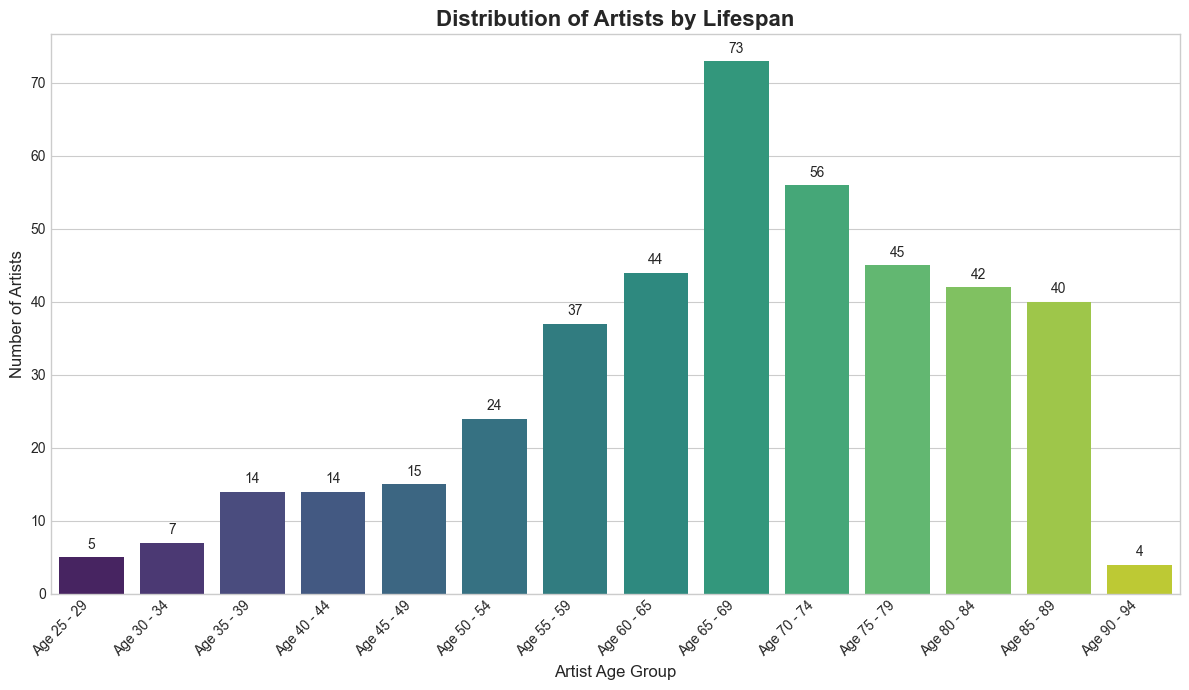

In [ ]:
plt.figure(figsize=(12, 7))

# Use seaborn's barplot function.
# x-axis: The age groups you defined.
# y-axis: The count of artists in each group.
barplot = sns.barplot(
    x='age_groups',
    y='number_of_artists_per_age',
    data=number_of_artists_per_age,
    palette='viridis' # You can choose different color palettes like 'mako', 'rocket', or 'Blues'
)

# 3. Add labels on top of each bar for better readability
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

# 4. Customize the plot for better presentation
plt.xlabel("Artist Age Groups", fontsize=12)
plt.ylabel("Number of Artists", fontsize=12)
plt.title("Distribution of Artists by Lifespan", fontsize=16, fontweight='bold')

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=45, ha='right') # 'ha' aligns the labels to the right of the tick

# Ensure the layout is tight so labels don't get cut off
plt.tight_layout()

# 5. Display the plot

In [19]:
df = pd.read_csv("age_group_vs_sale_price.csv")

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_35795/3849015810.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


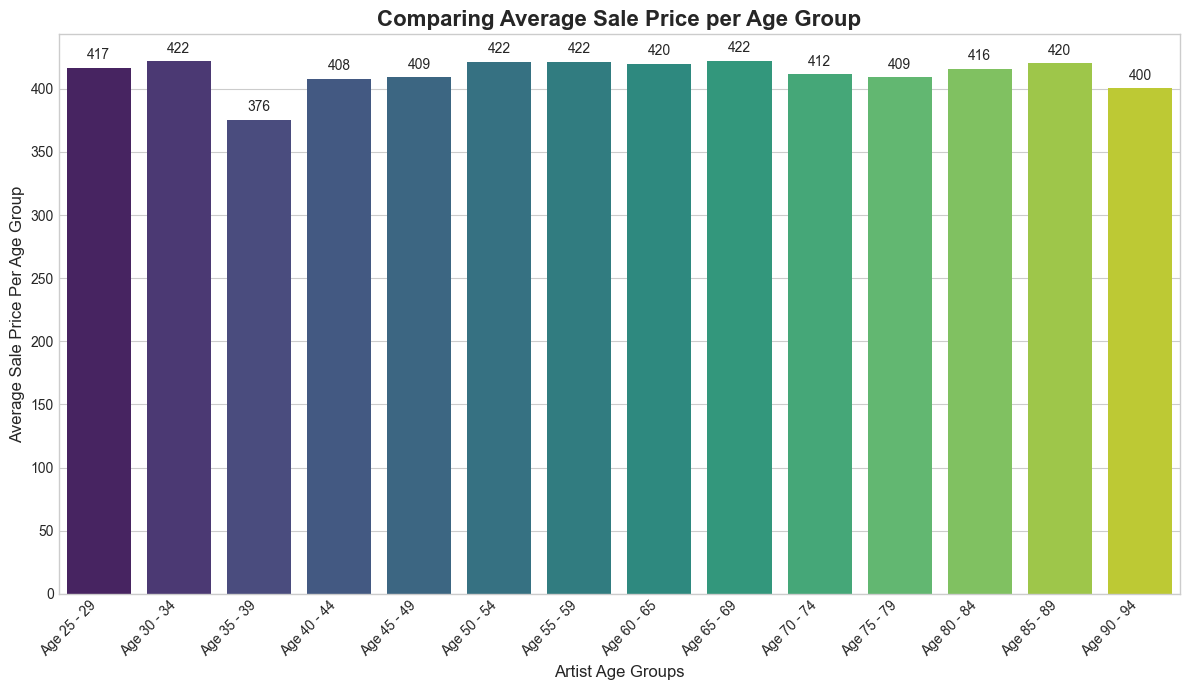

In [23]:
plt.figure(figsize=(12, 7))

# Use seaborn's barplot function.
# x-axis: The age groups you defined.
# y-axis: The count of artists in each group.
barplot = sns.barplot(
    x='age_groups',
    y='avg_sale_price_per_age_group',
    data=df,
    palette='viridis' # You can choose different color palettes like 'mako', 'rocket', or 'Blues'
)

# 3. Add labels on top of each bar for better readability
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

# 4. Customize the plot for better presentation
plt.xlabel("Artist Age Groups", fontsize=12)
plt.ylabel("Average Sale Price Per Age Group", fontsize=12)
plt.title("Comparing Average Sale Price per Age Group", fontsize=16, fontweight='bold')

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=45, ha='right') # 'ha' aligns the labels to the right of the tick

# Ensure the layout is tight so labels don't get cut off
plt.tight_layout()

# 5. Display the plot

no evidence age matters

In [24]:
df = pd.read_csv("subject_count.csv")

/var/folders/2n/c95ntf5d1wx1_vrd1b3ljbkw0000gn/T/ipykernel_35795/3842206475.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


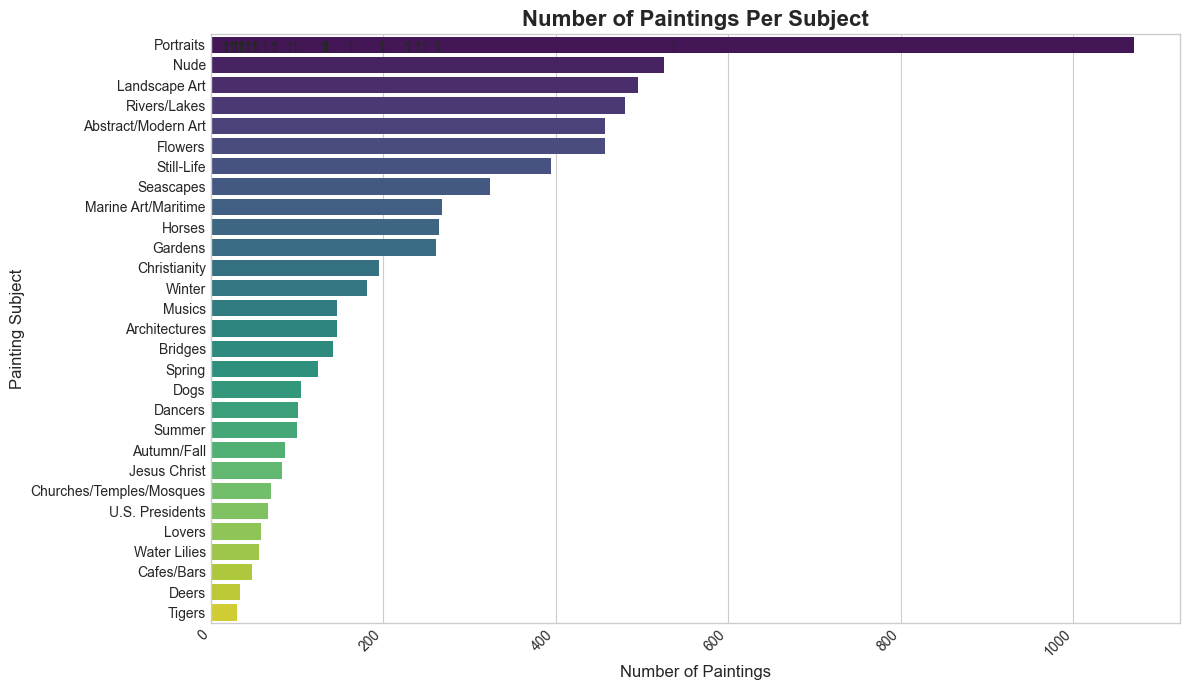

In [27]:
plt.figure(figsize=(12, 7))

# Use seaborn's barplot function.
# x-axis: The age groups you defined.
# y-axis: The count of artists in each group.
barplot = sns.barplot(
    x='subject_count',
    y='subject',
    data=df,
    palette='viridis' # You can choose different color palettes like 'mako', 'rocket', or 'Blues'
)

# 3. Add labels on top of each bar for better readability
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

# 4. Customize the plot for better presentation
plt.xlabel("Number of Paintings", fontsize=12)
plt.ylabel("Painting Subject", fontsize=12)
plt.title("Number of Paintings Per Subject", fontsize=16, fontweight='bold')

# Rotate the x-axis labels to prevent them from overlapping
plt.xticks(rotation=45, ha='right') # 'ha' aligns the labels to the right of the tick

# Ensure the layout is tight so labels don't get cut off
plt.tight_layout()

# 5. Display the plot